# Decision Tree
[參考資料 - 國立聯合大學陳士杰博士 - 機器學習課程 - 決策樹](http://debussy.im.nuu.edu.tw/sjchen/MachineLearning/final/CLS_DT.pdf)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
dataSet = pd.read_csv("Social_Network_Ads.csv")
print(dataSet.info())
dataSet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
# delete User ID
dataSet = dataSet.drop( columns=["User ID"] )
dataSet.head(5)

# check missing value
print(dataSet.isna().any())

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool


,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [4]:
# dummy Variable
dataSet = pd.get_dummies(dataSet)
dataSet.head(5)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1


In [5]:
# split Independent and dependent Variable 
# 只取2個變數方便後方圖形呈現
IndependentV = dataSet[["Age", "EstimatedSalary"]].values
dependentV = dataSet["Purchased"].values

In [6]:
# Feature Scaling
# 決策樹本身不需要特徵縮放，此處只是為了後方圖形呈現

from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()
IndependentV = StdScaler.fit_transform(IndependentV)

In [7]:
from sklearn.model_selection import train_test_split
IndependentV_train, IndependentV_test, dependentV_train, dependentV_test = train_test_split(IndependentV, dependentV, test_size=0.2, random_state=0)

## Entropy (熵)

用來表示資訊的雜亂程度</br>
公式如下</br>
![熵-計算公式](./entropy_formula.png)

S : 用來計算熵的資料集合</br>
Pi : 要用來預測的每個分類項目的機率(分布情況)，如硬幣的正反，是否購買

### Example 
投擲某硬幣的結果為 9個正面, 5個反面

由P1表示正面的機率, P1 = 9 / (9+5) = 9/14</br>
而P2表示反面的機率, P2 = 5 / (9+5) = 6/14</br>

則 E(coin) = -[ P1 x lg(P1) ] - [ P2 x lg(P2) ] = 0.94

最雜亂的情況 : 硬幣非常公正，正面和反面出線次數相同，熵為1</br>
最不雜亂的情況 : 硬幣非常不公正，只會有正面或反面，熵為0</br>

![熵-圖表](./entropy_graph.png)

## Information Gain (資訊獲利)
![資訊獲利-計算公式](./Information_gain_formula.png)

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)
model.fit(IndependentV_train, dependentV_train)
predict_result = model.predict(IndependentV_test)

In [29]:
from sklearn.metrics import confusion_matrix
ConM = confusion_matrix(dependentV_test, predict_result)
ConM

array([[55,  3],
       [ 1, 21]], dtype=int64)

C:\Users\maxt7\AppData\Local\Temp\ipykernel_200\287576176.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == modelPredict, 0], X_set[y_set == modelPredict, 1],


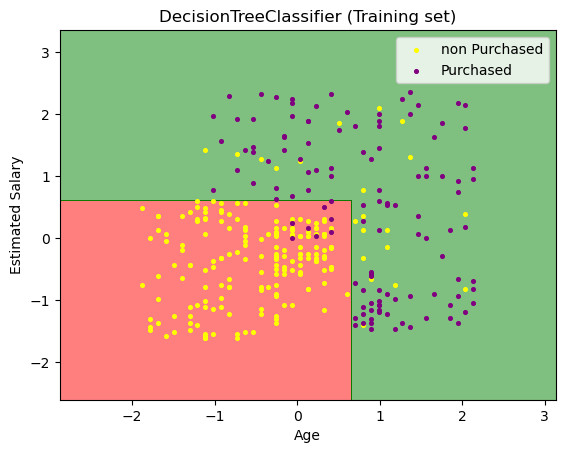

In [30]:
# data Visualization

# train data set
from matplotlib.colors import ListedColormap
X_set, y_set = IndependentV_train, dependentV_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step=0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step=0.01))


plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

typelist = ["non Purchased","Purchased"]
for index, modelPredict in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == modelPredict, 0], X_set[y_set == modelPredict, 1],
                c = ListedColormap(('yellow', 'purple'))(index), label = typelist[modelPredict], s=7)


plt.title('DecisionTreeClassifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\maxt7\AppData\Local\Temp\ipykernel_200\987135537.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == modelPredict, 0], X_set[y_set == modelPredict, 1],


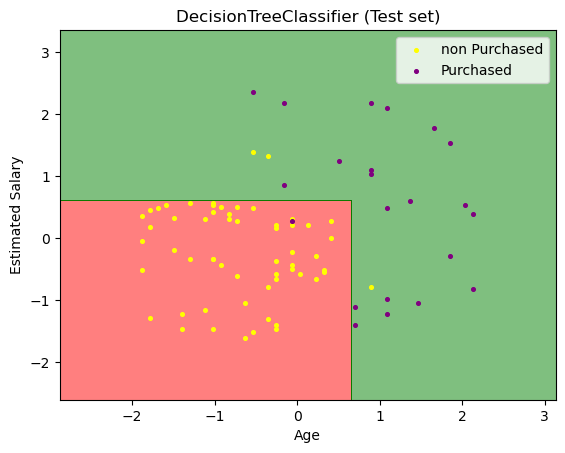

In [31]:
# data Visualization

# test data set
from matplotlib.colors import ListedColormap
X_set, y_set = IndependentV_test, dependentV_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step=0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step=0.01))


plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

typelist = ["non Purchased","Purchased"]
for index, modelPredict in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == modelPredict, 0], X_set[y_set == modelPredict, 1],
                c = ListedColormap(('yellow', 'purple'))(index), label = typelist[modelPredict], s=7)


plt.title('DecisionTreeClassifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()